**O que é esperado**: O grupo deve possuir agora uma boa compreensão dos dados escolhidos. O relatório deve conter uma análise exploratório inicial dos dados, com descrição de quais tipos de atributos existem, apresentar descrições estatísticas básicas como: total de instâncias, média, desvio padrão, etc. Também deve falar sobre a qualidade dos dados (existem dados faltantes? Existem erros?). Também deve existir pelo menos um planejamento de pré-processamento dos dados, como quais atributos serão removidos, quais serão convertidos, se os dados serão normalizados, como novos dados serão imputados, etc.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Municipal

In [6]:
# Lê os arquivos municipais
df1996Municipal = pd.read_csv('consulta_cand_1996_BRASIL.csv', encoding='latin1', sep=';')
df2000Municipal = pd.read_csv('consulta_cand_2000_BRASIL.csv', encoding='latin1', sep=';')
df2004Municipal = pd.read_csv('consulta_cand_2004_BRASIL.csv', encoding='latin1', sep=';')
df2008Municipal = pd.read_csv('consulta_cand_2008_BRASIL.csv', encoding='latin1', sep=';')
df2012Municipal = pd.read_csv('consulta_cand_2012_BRASIL.csv', encoding='latin1', sep=';')
df2016Municipal = pd.read_csv('consulta_cand_2016_BRASIL.csv', encoding='latin1', sep=';')
df2020Municipal = pd.read_csv('consulta_cand_2020_BRASIL.csv', encoding='latin1', sep=';')
df2024Municipal = pd.read_csv('consulta_cand_2024_BRASIL.csv', encoding='latin1', sep=';')

C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\780107509.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2000Municipal = pd.read_csv('consulta_cand_2000_BRASIL.csv', encoding='latin1', sep=';')
C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\780107509.py:4: DtypeWarning: Columns (20,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df2004Municipal = pd.read_csv('consulta_cand_2004_BRASIL.csv', encoding='latin1', sep=';')
C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\780107509.py:6: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  df2012Municipal = pd.read_csv('consulta_cand_2012_BRASIL.csv', encoding='latin1', sep=';')
C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\780107509.py:7: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  df2016Municipal = pd.read_csv('consulta_cand_2016_BR

In [7]:
dfMunicipal = pd.concat([df1996Municipal, df2000Municipal, df2004Municipal, df2008Municipal, df2012Municipal, df2016Municipal, df2020Municipal, df2024Municipal], join='inner')

In [8]:
print(f"{df1996Municipal.shape}, {df2000Municipal.shape}, {df2004Municipal.shape}, {df2008Municipal.shape}, {df2012Municipal.shape}, {df2016Municipal.shape}, {df2020Municipal.shape}, {df2024Municipal.shape}")
print(dfMunicipal.shape)

(10907, 63), (399455, 71), (402157, 63), (382079, 63), (483741, 63), (498391, 75), (558802, 50), (463598, 50)
(3199130, 44)


In [9]:
dfMunicipal.to_csv('municipal.csv', index=False)

In [10]:
for column in dfMunicipal.columns:
    print(column)

DT_GERACAO
HH_GERACAO
ANO_ELEICAO
CD_TIPO_ELEICAO
NM_TIPO_ELEICAO
NR_TURNO
CD_ELEICAO
DS_ELEICAO
DT_ELEICAO
SG_UF
SG_UE
NM_UE
CD_CARGO
DS_CARGO
SQ_CANDIDATO
NR_CANDIDATO
NM_CANDIDATO
NM_URNA_CANDIDATO
NM_SOCIAL_CANDIDATO
NR_CPF_CANDIDATO
CD_SITUACAO_CANDIDATURA
DS_SITUACAO_CANDIDATURA
TP_AGREMIACAO
NR_PARTIDO
SG_PARTIDO
NM_PARTIDO
SQ_COLIGACAO
NM_COLIGACAO
DS_COMPOSICAO_COLIGACAO
SG_UF_NASCIMENTO
DT_NASCIMENTO
NR_TITULO_ELEITORAL_CANDIDATO
CD_GENERO
DS_GENERO
CD_GRAU_INSTRUCAO
DS_GRAU_INSTRUCAO
CD_ESTADO_CIVIL
DS_ESTADO_CIVIL
CD_COR_RACA
DS_COR_RACA
CD_OCUPACAO
DS_OCUPACAO
CD_SIT_TOT_TURNO
DS_SIT_TOT_TURNO


In [11]:
print(dfMunicipal.dtypes)

DT_GERACAO                       object
HH_GERACAO                       object
ANO_ELEICAO                       int64
CD_TIPO_ELEICAO                   int64
NM_TIPO_ELEICAO                  object
NR_TURNO                          int64
CD_ELEICAO                        int64
DS_ELEICAO                       object
DT_ELEICAO                       object
SG_UF                            object
SG_UE                             int64
NM_UE                            object
CD_CARGO                          int64
DS_CARGO                         object
SQ_CANDIDATO                      int64
NR_CANDIDATO                      int64
NM_CANDIDATO                     object
NM_URNA_CANDIDATO                object
NM_SOCIAL_CANDIDATO              object
NR_CPF_CANDIDATO                 object
CD_SITUACAO_CANDIDATURA           int64
DS_SITUACAO_CANDIDATURA          object
TP_AGREMIACAO                    object
NR_PARTIDO                        int64
SG_PARTIDO                       object


In [12]:
# Substituir os valores para NaN nos campos de texto
dfMunicipal.replace({'#NULO': np.nan, '#NE': np.nan}, inplace=True)

# Substituir os valores para NaN nos campos numéricos
dfMunicipal.replace({-1: np.nan, -3: np.nan}, inplace=True)

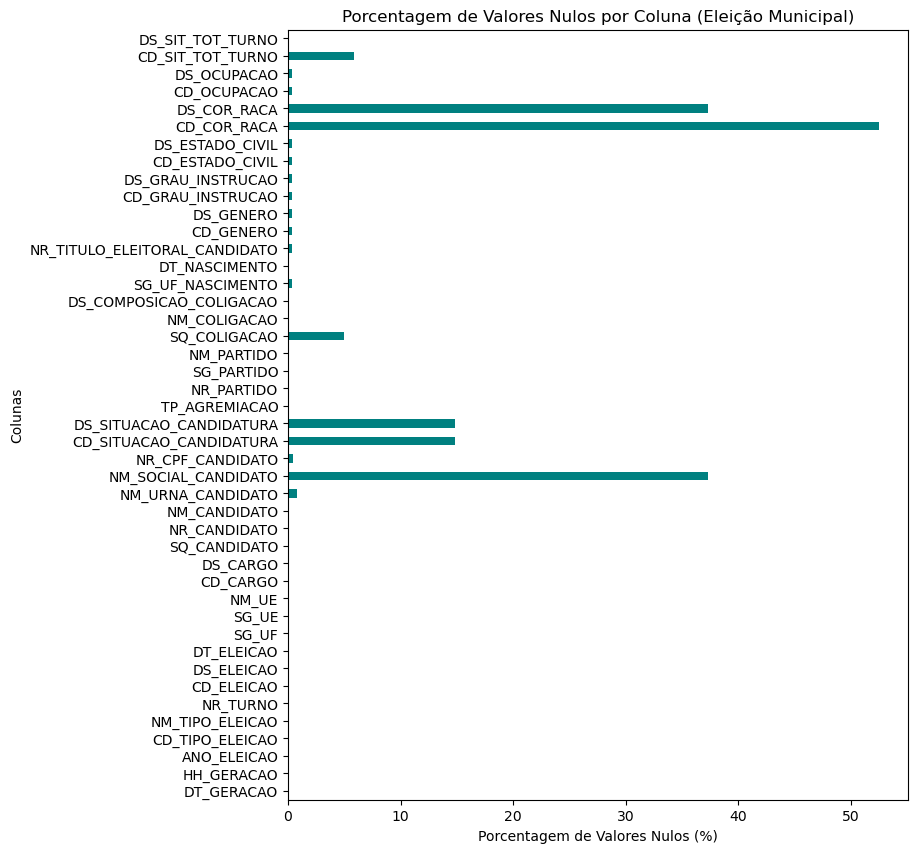

In [13]:
null_percentage = dfMunicipal.isnull().mean() * 100

# Plota a porcentagem de valores nulos por coluna com os eixos invertidos
plt.figure(figsize=(8, 10))  # Ajuste o tamanho para acomodar as barras horizontais
null_percentage.plot(kind='barh', color='teal')
plt.title('Porcentagem de Valores Nulos por Coluna (Eleição Municipal)')
plt.ylabel('Colunas')
plt.xlabel('Porcentagem de Valores Nulos (%)')
plt.show()

In [14]:
dfMunicipal['DS_COR_RACA'].value_counts()

DS_COR_RACA
BRANCA            742421
PARDA             602172
#NE#              483741
PRETA             154185
NÃO INFORMADO       9130
INDÍGENA            6516
AMARELA             5930
NÃO DIVULGÁVEL       437
Name: count, dtype: int64

In [15]:
dfMunicipal['DS_COR_RACA'].value_counts()

DS_COR_RACA
BRANCA            742421
PARDA             602172
#NE#              483741
PRETA             154185
NÃO INFORMADO       9130
INDÍGENA            6516
AMARELA             5930
NÃO DIVULGÁVEL       437
Name: count, dtype: int64

# Presindencial

In [17]:
# Lê os arquivos presidenciais
df1994Presidencial = pd.read_csv('consulta_cand_1994_BRASIL.csv', encoding='latin1', sep=';')
df1998Presidencial = pd.read_csv('consulta_cand_1998_BRASIL.csv', encoding='latin1', sep=';')
df2002Presidencial = pd.read_csv('consulta_cand_2002_BRASIL.csv', encoding='latin1', sep=';')
df2006Presidencial = pd.read_csv('consulta_cand_2006_BRASIL.csv', encoding='latin1', sep=';')
df2010Presidencial = pd.read_csv('consulta_cand_2010_BRASIL.csv', encoding='latin1', sep=';')
df2014Presidencial = pd.read_csv('consulta_cand_2014_BRASIL.csv', encoding='latin1', sep=';')
df2018Presidencial = pd.read_csv('consulta_cand_2018_BRASIL.csv', encoding='latin1', sep=';')
df2022Presidencial = pd.read_csv('consulta_cand_2022_BRASIL.csv', encoding='latin1', sep=';')

C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\2176024716.py:7: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  df2014Presidencial = pd.read_csv('consulta_cand_2014_BRASIL.csv', encoding='latin1', sep=';')


In [19]:
dfPresidencial = pd.concat([df1994Presidencial, df1998Presidencial, df2002Presidencial, df2006Presidencial, df2010Presidencial, df2014Presidencial, df2018Presidencial, df2022Presidencial], join='inner')

In [20]:
dfPresidencial.to_csv('presidencial.csv', index=False)

In [21]:
dfPresidencial['DS_COR_RACA'].value_counts()

DS_COR_RACA
#NE               59151
BRANCA            43883
PARDA             30189
#NE#              22577
PRETA              9720
INDÍGENA            407
AMARELA             405
NÃO DIVULGÁVEL      148
NÃO INFORMADO       120
Name: count, dtype: int64

In [22]:
print(f"{df1994Presidencial.shape}, {df1998Presidencial.shape}, {df2002Presidencial.shape}, {df2006Presidencial.shape}, {df2010Presidencial.shape}, {df2014Presidencial.shape}, {df2018Presidencial.shape}, {df2022Presidencial.shape}")

(6647, 63), (15092, 63), (18109, 63), (19303, 63), (22577, 63), (26271, 63), (29287, 63), (29314, 50)


In [23]:
print(dfPresidencial.shape)

(166600, 45)


In [24]:
for column in dfPresidencial.columns: print(column)

DT_GERACAO
HH_GERACAO
ANO_ELEICAO
CD_TIPO_ELEICAO
NM_TIPO_ELEICAO
NR_TURNO
CD_ELEICAO
DS_ELEICAO
DT_ELEICAO
TP_ABRANGENCIA
SG_UF
SG_UE
NM_UE
CD_CARGO
DS_CARGO
SQ_CANDIDATO
NR_CANDIDATO
NM_CANDIDATO
NM_URNA_CANDIDATO
NM_SOCIAL_CANDIDATO
NR_CPF_CANDIDATO
CD_SITUACAO_CANDIDATURA
DS_SITUACAO_CANDIDATURA
TP_AGREMIACAO
NR_PARTIDO
SG_PARTIDO
NM_PARTIDO
SQ_COLIGACAO
NM_COLIGACAO
DS_COMPOSICAO_COLIGACAO
SG_UF_NASCIMENTO
DT_NASCIMENTO
NR_TITULO_ELEITORAL_CANDIDATO
CD_GENERO
DS_GENERO
CD_GRAU_INSTRUCAO
DS_GRAU_INSTRUCAO
CD_ESTADO_CIVIL
DS_ESTADO_CIVIL
CD_COR_RACA
DS_COR_RACA
CD_OCUPACAO
DS_OCUPACAO
CD_SIT_TOT_TURNO
DS_SIT_TOT_TURNO


In [25]:
print(dfPresidencial.dtypes)

DT_GERACAO                       object
HH_GERACAO                       object
ANO_ELEICAO                       int64
CD_TIPO_ELEICAO                   int64
NM_TIPO_ELEICAO                  object
NR_TURNO                          int64
CD_ELEICAO                        int64
DS_ELEICAO                       object
DT_ELEICAO                       object
TP_ABRANGENCIA                   object
SG_UF                            object
SG_UE                            object
NM_UE                            object
CD_CARGO                          int64
DS_CARGO                         object
SQ_CANDIDATO                      int64
NR_CANDIDATO                      int64
NM_CANDIDATO                     object
NM_URNA_CANDIDATO                object
NM_SOCIAL_CANDIDATO              object
NR_CPF_CANDIDATO                 object
CD_SITUACAO_CANDIDATURA           int64
DS_SITUACAO_CANDIDATURA          object
TP_AGREMIACAO                    object
NR_PARTIDO                        int64


In [26]:
# Substituir os valores para NaN nos campos de texto
dfPresidencial.replace({'#NULO': np.nan, '#NE': np.nan}, inplace=True)

# Substituir os valores para NaN nos campos numéricos
dfPresidencial.replace({-1: np.nan, -3: np.nan}, inplace=True)

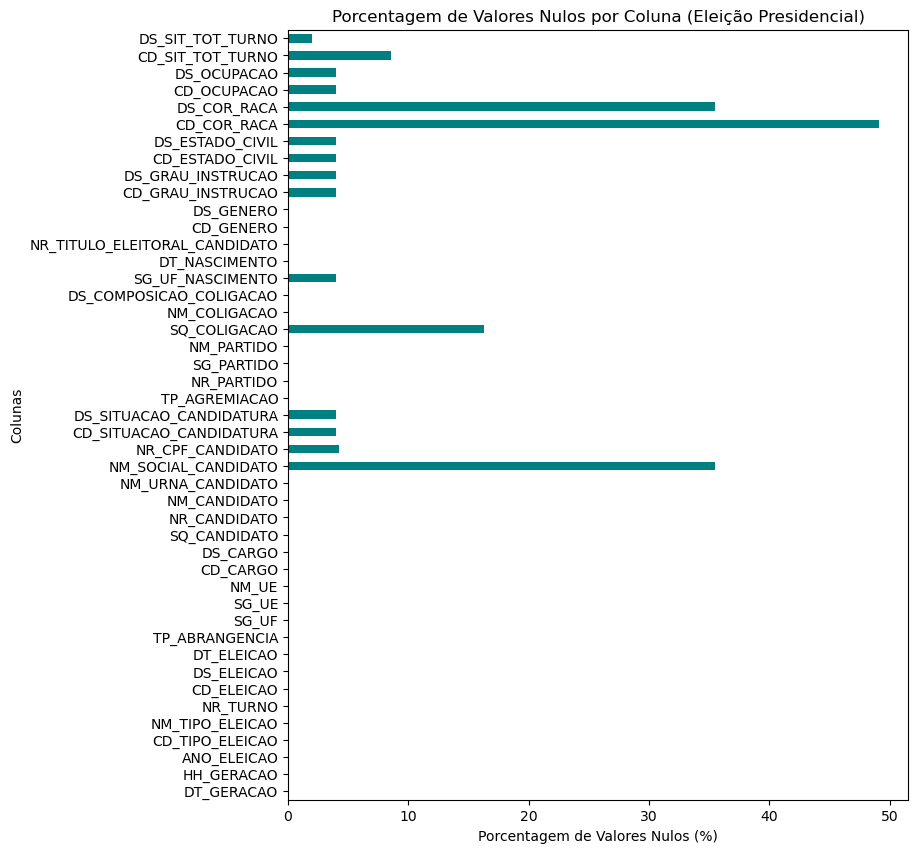

In [27]:
null_percentage = dfPresidencial.isnull().mean() * 100

# Plota a porcentagem de valores nulos por coluna com os eixos invertidos
plt.figure(figsize=(8, 10))  # Ajuste o tamanho para acomodar as barras horizontais
null_percentage.plot(kind='barh', color='teal')
plt.title('Porcentagem de Valores Nulos por Coluna (Eleição Presidencial)')
plt.ylabel('Colunas')
plt.xlabel('Porcentagem de Valores Nulos (%)')
plt.show()

# Outras análises

In [ ]:
dfPresidencial['DS_COR_RACA'].value_counts()

In [ ]:
dfMunicipal['DS_COR_RACA'].value_counts()

In [ ]:
dataframes = [
    ('1994 Presidencial', df1994Presidencial),
    ('1996 Municipal', df1996Municipal),
    ('1998 Presidencial', df1998Presidencial),
    ('2000 Municipal', df2000Municipal),
    ('2002 Presidencial', df2002Presidencial),
    ('2004 Municipal', df2004Municipal),
    ('2006 Presidencial', df2006Presidencial),
    ('2008 Municipal', df2008Municipal),
    ('2010 Presidencial', df2010Presidencial),
    ('2012 Municipal', df2012Municipal),
    ('2014 Presidencial', df2014Presidencial),
    ('2016 Municipal', df2016Municipal),
    ('2018 Presidencial', df2018Presidencial),
    ('2020 Municipal', df2020Municipal),
    ('2022 Presidencial', df2022Presidencial),
    ('2024 Municipal', df2024Municipal),
]

# Coletar todos os nomes de colunas únicos de todos os datasets
todas_colunas = set()
for nome, df in dataframes:
    todas_colunas.update(df.columns)

# **Converte o conjunto em uma lista**
todas_colunas = list(todas_colunas)

# Criar um DataFrame para indicar a presença (1) ou ausência (0) de colunas em cada dataset
presenca_df = pd.DataFrame(0, index=[nome for nome, _ in dataframes], columns=todas_colunas)

for nome, df in dataframes:
    presenca_df.loc[nome, df.columns] = 1

# Opcional: Ordenar colunas e datasets pelo número de ocorrências
#soma_colunas = presenca_df.sum(axis=0)
#colunas_ordenadas = soma_colunas.sort_values(ascending=False).index
#soma_linhas = presenca_df.sum(axis=1)
#linhas_ordenadas = soma_linhas.sort_values(ascending=False).index

#presenca_df = presenca_df.loc[linhas_ordenadas, colunas_ordenadas]

# Opcional: Filtrar colunas que aparecem em apenas um dataset para reduzir a desordem
#colunas_para_manter = soma_colunas[soma_colunas > 1].index
#presenca_df = presenca_df[colunas_para_manter]

# Plotar o heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(presenca_df, cmap='viridis', cbar=False)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Presença de Colunas nos Datasets')
plt.tight_layout()
plt.show()


In [ ]:
dfMunicipal.shape[0] + dfPresidencial.shape[0]

# União dos dois datasets

In [28]:
municipal = pd.read_csv('municipal.csv', sep=',')

C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\3987777472.py:1: DtypeWarning: Columns (19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  municipal = pd.read_csv('municipal.csv', sep=',')


In [29]:
presidencial = pd.read_csv('presidencial.csv', sep=',')

C:\Users\gabri\AppData\Local\Temp\ipykernel_1948\3956696470.py:1: DtypeWarning: Columns (20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  presidencial = pd.read_csv('presidencial.csv', sep=',')


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(municipal.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap de Valores Nulos por Coluna")
plt.show()

In [ ]:
unido = pd.concat([municipal, presidencial], join='inner')

In [34]:
unido.shape

(3365730, 45)

In [ ]:
unido.to_csv('unido.csv', index=False)